## Project Milestone 5 DSC 420 Merging the Data and Storing in a Database/Visualizing Data
create by: David Hatchett  
created: 2024-02-22  

I have been storing my data in a database throughout the process. For reference, please see the code in the following files.  
    DSC420_MILESTONE2_HATCHETT.ipynb  
    DSC420_MILESTONE3_HATCHETT.ipynb  
    DSC420_MILESTONE4_HATCHETT.ipynb  

I created the following tables through these process  

**Milestone 2:**  

    ttb_game_list  
        - is a list of games from a time-to-beat file pulled from Kagle. 
        
    ttb_game_genres  
        - is a list of games and the genres attached to the game. Each game can have more than one genre.  
        - joins to ttb_game_list by id to ttb_game_id.
        
    ttb_game_stats  
        - Stores the states for each game by different categories of pay. Ie 100%, minimal, fast, and so on.  
        - joins to ttb_game_list via id to ttb_game_id.  

**Milestone 3:** 

    gdq_games_runs  
        - is a list of speed runs from a GDQ event that occurred in 2020.  

**Milesone 4:**

    sp_games_stage  
        - is a list of all games with records on speedruns.com and their id on speedruns.com.  
        
    game_list_bridge  
        - is a list that bridges the id from ttb_game_list to the id on spd_rns_data. Created via fuzzy matching.  
        
    spd_rns_data  
        - a list of games from speedrun.com and the top three runs by category.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import Levenshtein

from IPython.display import clear_output

In [5]:
with sqlite3.connect('game_data.db') as con:
    cur = con.cursor()
    gdq_games = pd.read_sql("select * from gdq_games_runs",con)
    game_bridge = pd.read_sql("select * from game_list_bridge", con)

In [47]:
### Need to match ids to the GDQ Data
for indx, row in gdq_games.iterrows():
    chck_val = row['name']
    frst_val = chck_val[0]
    match_list = list()
    clear_output(wait = True)

    lst_for_revew = game_bridge[game_bridge['game_name'].str.startswith(frst_val)]

    for gindx, grow in lst_for_revew.iterrows():
        dist_val = Levenshtein.jaro_winkler(chck_val,grow['game_name'])
        if dist_val >= .80:
            match_list.append((dist_val,grow['id'],grow['game_name']))

        
    if len(match_list) > 0:
        sort_list = sorted(match_list, key=lambda x: x[0], reverse = True)
        print(f'Match Found!! check: {chck_val} | match: {sort_list}')       
    
        gdq_games.loc[indx,'gm_id'] = sort_list[0][1]
  

Match Found!! check: Finale The End | match: [(0.8561904761904762, 15042, 'Final Fight One'), (0.8492857142857143, 46631, 'Final Zone'), (0.8457142857142858, 5157, 'Final Vendetta'), (0.8430014430014431, 16272, 'Final Match Tennis'), (0.8400000000000001, 4796, 'Final Exam'), (0.8400000000000001, 24115, 'Final Rush'), (0.8400000000000001, 54731, 'Final Shot'), (0.8373626373626374, 8835, 'Final Fight 2'), (0.8373626373626374, 9129, 'Final Fight 3'), (0.8365686944634313, 28508, 'Final Fight Revenge'), (0.8349206349206351, 58320, 'Final Lap Twin'), (0.834126984126984, 57374, 'Final Theory'), (0.8305555555555555, 46111, 'Find The Balance'), (0.8272727272727273, 4233, 'Final Fight'), (0.8269841269841269, 40987, 'Final Set'), (0.8225885225885226, 41307, 'Final Theosis'), (0.8225885225885226, 47270, 'Final Zone II'), (0.820952380952381, 18457, 'Final Fight Guy'), (0.8204425204425204, 36461, 'Final Fantasy: Endless Nova'), (0.8083333333333333, 6069, 'Fingered')]


In [48]:
gdq_games[gdq_games['gm_id'].isnull() == False]

,index,name,runners,hosts,commentators,description,start_time,run_time,bid_wars,run_time_delta,gm_id
1,1,Nioh 2 Any% Featherless,AxelSanGo,PurpleGhostKasper,,,2022-01-09 12:07:00-05:00,1:27:15,0,5235000000000,2611.0
2,2,Metroid Prime Hunters All Items,Mr_Shasta,PurpleGhostKasper,,,2022-01-09 13:53:00-05:00,1:20:12,1,4812000000000,4102.0
3,3,Donkey Kong Country 2: Diddy's Kong Quest Any%,"Eazinn, V0oid, SBDWolf, Tonkotsu",Skybilz,,,2022-01-09 15:50:00-05:00,0:41:00,0,2460000000000,1971.0
4,4,DEATHLOOP Any%,CreeperHntr,Skybilz,,,2022-01-09 16:57:00-05:00,0:26:46,0,1606000000000,47754.0
5,5,Axiom Verge 2 Any% Major Glitches,SeraphinEveles,Skybilz,,,2022-01-09 17:32:00-05:00,0:11:54,0,714000000000,708.0
...,...,...,...,...,...,...,...,...,...,...,...
141,141,Tetris: The Grand Master GM Race,"JBroms, PARTY MAN X, PiePusher11, spc",Mr. Game and Shout,,,2022-01-15 18:01:00-05:00,0:11:53,1,713000000000,41999.0
142,142,Sekiro: Shadows Die Twice Blindfolded Any%,Mitchriz,Mr. Game and Shout,,,2022-01-15 18:40:00-05:00,2:00:35,0,7235000000000,23.0
143,143,Portal 2 Inbounds,Msushi,Mr. Game and Shout,,,2022-01-15 20:58:00-05:00,1:01:20,0,3680000000000,73.0
147,147,"Metal Gear Solid Console, All Bosses, Extreme",dlimes13,ateatree,,,2022-01-16 00:27:03-05:00,1:21:20,1,4880000000000,889.0


In [49]:
### write back to database
with sqlite3.connect('game_data.db') as con:
    gdq_games.to_sql('gdq_games_runs', con, if_exists='replace')

## Create a single dataset with all three datasets.

I'm pulling all the game data that matchs from the time to beat list, appared in the 2022 GDQ, and I'm outputing all of their speed runing catagorys and top 3 runs

In [51]:
sql_txt ="""
SELECT 
    a.game_name
    , b.relase_date
    , b.relase_year
    , b.review_score
    , c.name as gdq_name
    , c.runners
    , c.run_time
    , d.category_name
    , d.category_rules
    , d.run_1_time
    , d.run_2_time
    , d.run_3_time
FROM game_list_bridge as a
    left join ttb_game_list as b
        on a.id = b.id
    left join gdq_games_runs as c
        on a.id = c.gm_id
    left join spd_rns_data as d
        on a.spd_rn_id = d.spd_rn_id
WHERE
    a.spd_rn_id is not null
    AND c.gm_id is not null
"""


with sqlite3.connect('game_data.db') as con:
    combined_df = pd.read_sql(sql_txt, con)

combined_df

##20056 
##121

,game_name,relase_date,relase_year,review_score,gdq_name,runners,run_time,category_name,category_rules,run_1_time,run_2_time,run_3_time
0,Sekiro: Shadows Die Twice,2019-03-22,2019.0,90.0,Sekiro: Shadows Die Twice Blindfolded Any%,Mitchriz,2:00:35,All Achievements,Beat the game and obtain **all 34 achievements...,14726.0,15324.0,15873.0
1,Sekiro: Shadows Die Twice,2019-03-22,2019.0,90.0,Sekiro: Shadows Die Twice Blindfolded Any%,Mitchriz,2:00:35,All Bosses/Minibosses,Beat the game and defeat all of the following ...,3936.0,3947.0,3970.0
2,Sekiro: Shadows Die Twice,2019-03-22,2019.0,90.0,Sekiro: Shadows Die Twice Blindfolded Any%,Mitchriz,2:00:35,All Memories,Beat the game with all of the following **Memo...,2626.0,2628.0,2638.0
3,Sekiro: Shadows Die Twice,2019-03-22,2019.0,90.0,Sekiro: Shadows Die Twice Blindfolded Any%,Mitchriz,2:00:35,All Memories & Prayer Beads,Beat the game with all of the following **Memo...,3706.0,3725.0,3838.0
4,Sekiro: Shadows Die Twice,2019-03-22,2019.0,90.0,Sekiro: Shadows Die Twice Blindfolded Any%,Mitchriz,2:00:35,Immortal Severance,Beat the game by triggering the **Immortal Sev...,1420.0,1527.0,1536.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Bucky O'Hare (Arcade),None,1992.0,72.0,Bucky O'Hare Normal Mode,KLM1187,0:26:21,4P,4 Players for the game.\r\nYou can choose any ...,2183.0,NaN,NaN
1443,Cranked Up,2021-07-13,2021.0,50.0,Cranked Up Floor is Lava,Bullets,0:11:08,Adventure,None,485.0,487.0,506.0
1444,Cranked Up,2021-07-13,2021.0,50.0,Cranked Up Floor is Lava,Bullets,0:11:08,Floor Is Lava,- See base rules\r\n- All levels must be done ...,582.0,762.0,808.0
1445,Rockman & Forte Mirai kara no Chōsensha,2003-03-10,2003.0,NaN,Rockman & Forte Any% (Rockman),Amad,0:36:07,None,None,NaN,NaN,NaN


## Visualization 1 Top 20 games by Genres for games all games in dataset

In [2]:
sql_txt ="""
with list as (
    SELECT
        replace(genres, ' ','') as genres
        , count(distinct ttb_game_id) as cnt
        , RANK() OVER(ORDER BY count(distinct ttb_game_id)  desc) as rnk
    FROM ttb_game_genres
    WHERE
        genres <> ''
    group by 
        replace(genres, ' ','')
    )

SELECT 
*
FROM list
where rnk <= 20
"""


with sqlite3.connect('game_data.db') as con:
    combined_df = pd.read_sql(sql_txt, con)

combined_df

,genres,cnt,rnk
0,Action,11446,1
1,Adventure,9466,2
2,Role-Playing,6017,3
3,Puzzle,4936,4
4,Shooter,4830,5
5,Platform,4368,6
6,First-Person,3549,7
7,Simulation,3487,8
8,Sports,2760,9
9,Strategy,2739,10


Text(0.5, 1.0, 'Top 20 Genres of Games')

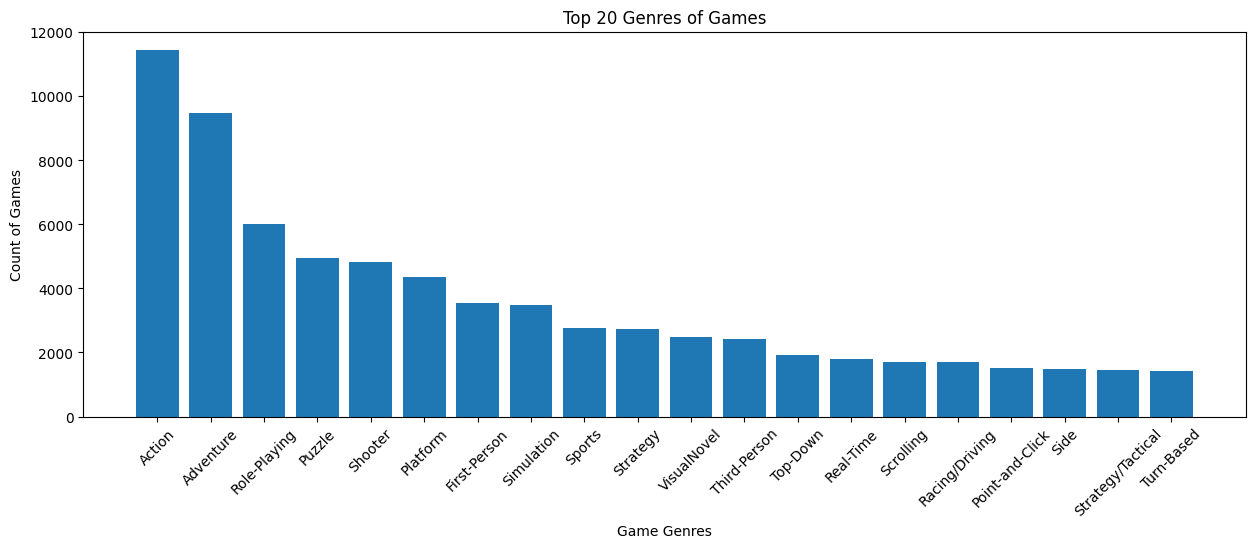

In [3]:
cats = combined_df['genres']
counts = combined_df['cnt']

fig, ax = plt.subplots(figsize = (15,5))

ax.bar(cats,counts)
ax.tick_params(axis='x',labelrotation = 45)
ax.set_xlabel('Game Genres')
ax.set_ylabel('Count of Games')
ax.set_title('Top 20 Genres of Games')



## Visualization 2 Top 20 games by Genres for games for speedruns
This is one of my 2 combined datasets. I feel this should still count as game_list_bridge is a combination of two datasets already

In [4]:
sql_txt ="""
with list as (
    SELECT
        replace(genres, ' ','') as genres
        , count(distinct ttb_game_id) as cnt
        , RANK() OVER(ORDER BY count(distinct ttb_game_id)  desc) as rnk
    FROM ttb_game_genres AS A
        LEFT JOIN game_list_bridge AS B
            ON a.ttb_game_id = b.id
    WHERE
        genres <> ''
        AND b.spd_rn_id is not null
    group by 
        replace(genres, ' ','')
    )

SELECT 
*
FROM list
where rnk <= 20
"""

with sqlite3.connect('game_data.db') as con:
    combined_df = pd.read_sql(sql_txt, con)

combined_df

,genres,cnt,rnk
0,Action,4742,1
1,Adventure,3422,2
2,Platform,2341,3
3,Shooter,1919,4
4,Role-Playing,1773,5
5,Puzzle,1541,6
6,First-Person,1406,7
7,Sports,1155,8
8,Third-Person,1083,9
9,Simulation,847,10


Text(0.5, 1.0, 'Top 20 Genres of Games for games on speedruns.com by games')

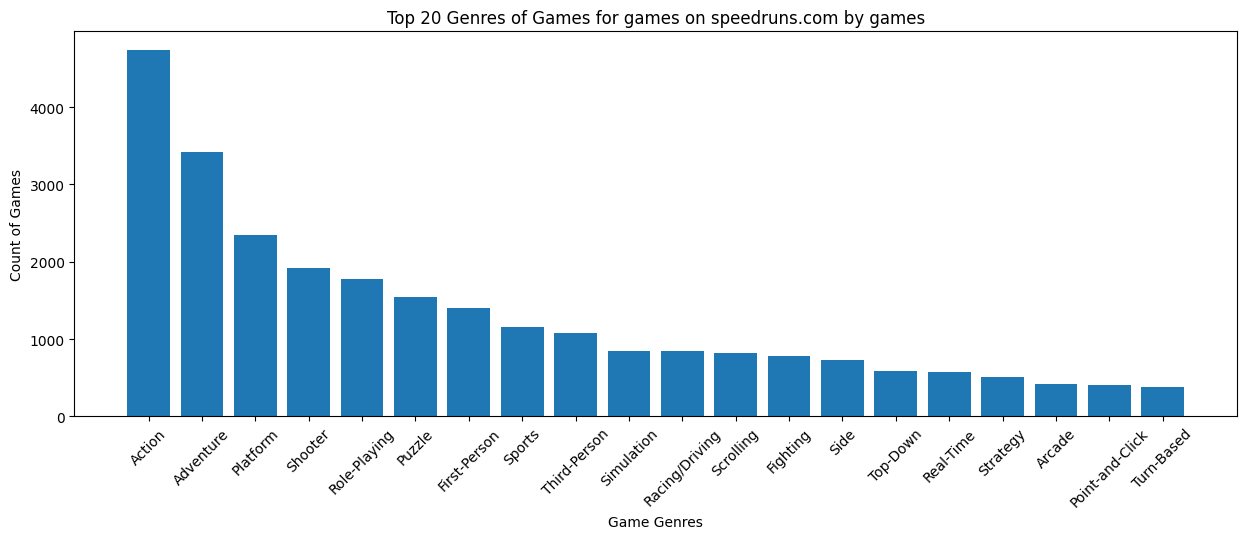

In [5]:
cats = combined_df['genres']
counts = combined_df['cnt']

fig, ax = plt.subplots(figsize = (15,5))

ax.bar(cats,counts)
ax.tick_params(axis='x',labelrotation = 45)
ax.set_xlabel('Game Genres')
ax.set_ylabel('Count of Games')
ax.set_title('Top 20 Genres of Games for games on speedruns.com by games')


# Visualization 3 Time to Complete Normally Compared to Speed Runs
this is the second combined data set visualization.

In [86]:
sql_txt ="""

with stats as (
    SELECT 
        ttb_game_id
        , (value / 60) as ttc_in_hr
    FROM ttb_game_stats
    WHERE
        category = 'Single-Player'
        and sub_category_1 = 'Main Story'
        and sub_category_2 = 'Average'
        and value > 0
)
, spd_rns as (
    SELECT 
        spd_rn_id
        , (run_1_time/60) /60 as run_1_time
        , (run_2_time/60) /60 as run_2_time
        , (run_3_time/60) /60 as run_3_time
        ,row_number() over(partition by spd_rn_id) as rnk
    FROM spd_rns_data
    WHERE 
        category_name = 'Any%'
    and 
        run_1_time is not null
    )
SELECT 
    GL.ID,
    sps.spd_rn_id,
    GL.game_name,
    GL.relase_date,
    GL.relase_year,
    GL.review_score,
    STS.ttc_in_hr,
    SPS.run_1_time ,
    SPS.run_2_time ,
    SPS.run_3_time 
    
FROM game_list_bridge as BASE
    LEFT JOIN stats AS STS
        ON BASE.id = STS.ttb_game_id
    LEFT JOIN spd_rns AS SPS
        ON BASE.spd_rn_id = SPS.spd_rn_id
        and rnk = 1
    LEFT JOIN ttb_game_list AS GL
        ON BASE.ID = GL.ID
WHERE 
    sps.spd_rn_id  is not null
    and ttc_in_hr is not null
"""

with sqlite3.connect('game_data.db') as con:
    combined_df = pd.read_sql(sql_txt, con)

combined_df

,id,spd_rn_id,game_name,relase_date,relase_year,review_score,ttc_in_hr,run_1_time,run_2_time,run_3_time
0,1,369penl1,Borderlands 3,2019-09-13,2019.0,76.0,23.283333,2.00000,2.151944,2.306389
1,3,lde77j13,Middle-Earth: Shadow of War,2017-10-10,2017.0,76.0,20.783333,2.00000,2.578889,2.870833
2,5,nj1nee1p,Grand Theft Auto IV,2008-04-29,2008.0,82.0,27.616667,3.00000,3.362222,3.413889
3,8,j1lqwz6g,Borderlands: The Pre-Sequel!,2014-10-14,2014.0,70.0,18.216667,1.00000,1.752778,1.880833
4,9,46w3yo71,Assassin's Creed Odyssey,2018-10-04,2018.0,80.0,45.166667,3.00000,3.253056,3.306944
...,...,...,...,...,...,...,...,...,...,...
5749,60093,v1pxx4m6,Bleach: Heat the Soul 2,2005-09-01,2005.0,75.0,6.000000,0.00000,0.262222,0.316111
5750,60245,k6q4xoxd,TWWWR,2020-11-24,2020.0,60.0,1.500000,0.00000,0.229444,0.238333
5751,60260,o6glo7nd,The Glass Staircase,2019-03-30,2019.0,50.0,1.900000,0.00000,0.435833,0.462222
5752,60297,kdkwogdm,Entropy Rising,2015-11-20,2015.0,NaN,5.516667,0.00000,NaN,NaN


Text(0.5, 1.0, 'Speed Run Compaired to AVG Time to Beat (All Categories)')

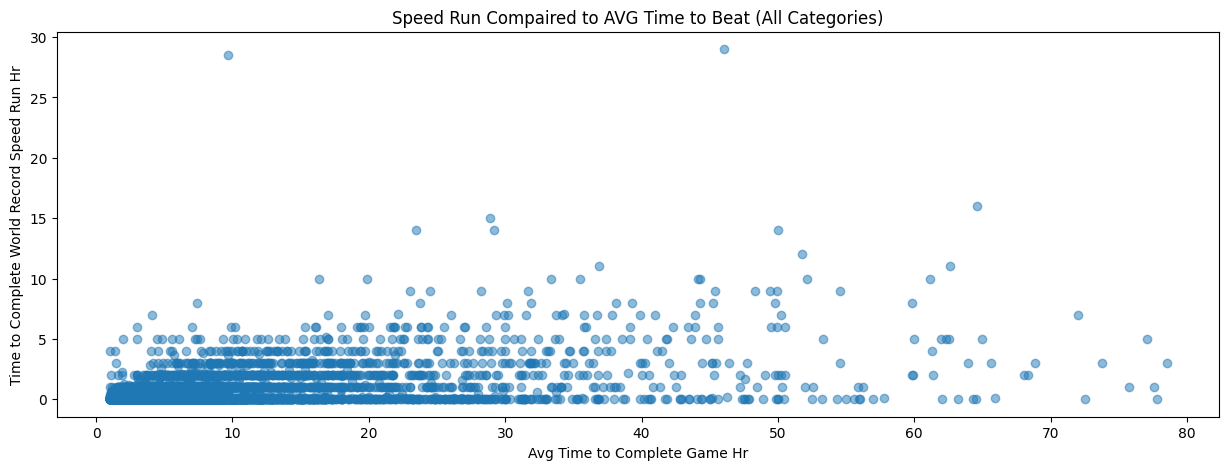

In [98]:
##exuldeing anything over 150 hrs to complete
sub_set = combined_df[combined_df.ttc_in_hr <80]

fig, ax = plt.subplots(figsize = (15,5))

ax.scatter(sub_set.ttc_in_hr,sub_set.run_1_time, alpha = .5)

ax.set_xlabel('Avg Time to Complete Game Hr')
ax.set_ylabel('Time to Complete World Record Speed Run Hr')
ax.set_title('Speed Run Compaired to AVG Time to Beat (All Categories)')


# Visualization 4 First and Second Place Speed Run Compaired.
I did filiter this output down to speed runs that take less then 10 hours to complete.

Text(0.5, 1.0, 'Frist and Second Place Speed Runs in Mins')

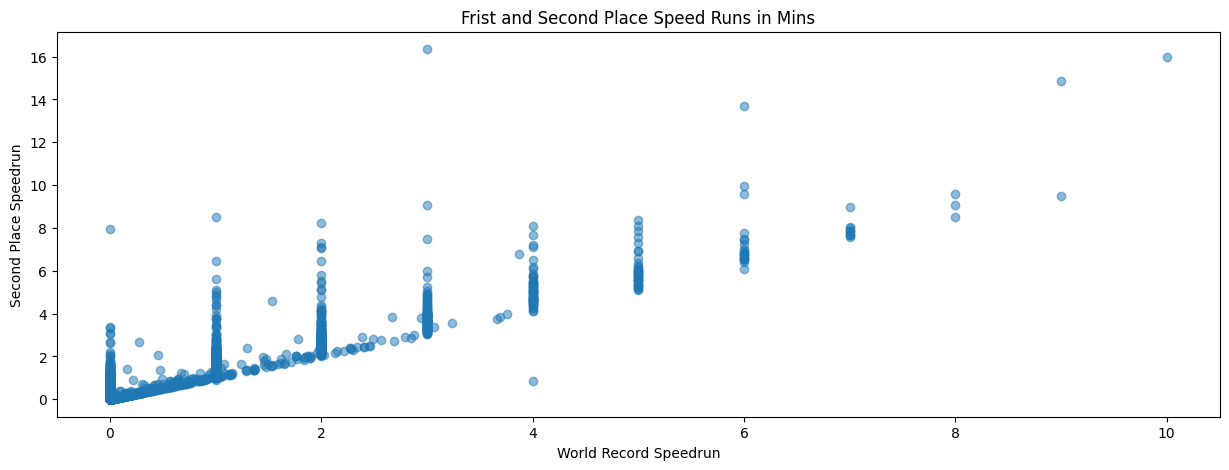

In [117]:
sub_set = combined_df[(combined_df.run_1_time <=10) & (combined_df.run_2_time.isnull()== False)]

fig, ax = plt.subplots(figsize = (15,5))

ax.scatter(sub_set.run_1_time,sub_set.run_2_time, alpha = .5)

ax.set_xlabel('World Record Speedrun')
ax.set_ylabel('Second Place Speedrun')
ax.set_title('Frist and Second Place Speed Runs in Mins')

# Visualization 5 Mean Review Scores by Release Year


Text(0.5, 1.0, 'Mean Review Score by Release Year')

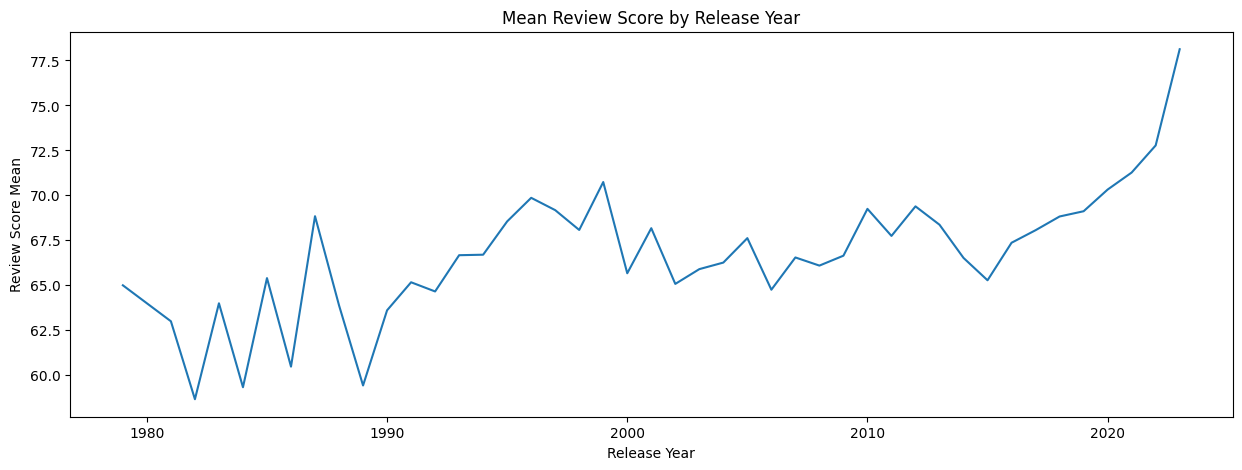

In [133]:
##exuldeing anything over 150 hrs to complete
mean_rvw_scr = combined_df.groupby(combined_df.relase_year)['review_score'].mean()
mean_tmt_to_bt = combined_df.groupby(combined_df.relase_year)['ttc_in_hr'].mean()

fig, ax = plt.subplots(figsize = (15,5))

ax.plot(mean_rvw_scr)
ax.set_xlabel('Release Year')
ax.set_ylabel('Review Score Mean')
ax.set_title('Mean Review Score by Release Year')


# What I've Learned and Ehical Implications

I will start out by addressing any ethical issues or concerns. I removed records from the datasets to make the visual easier to read. The records removed could be possible outliners and require further review. Outside of this concern, I don’t really see any ethical implications.  

While working on my visualizations, I came across a few issues that had to handle that could have been handled earlier. The genre data from week 1 had duplicate genres due to extra spaces that I did not look for. I also wished I had spent more time in an earlier week setting all the time data to the same grain. I end up with some in hours and some in seconds. These could have been avoided if I had spent more time during the initial planning for this project.  

Overall, I think things went well for this part of the assignment. For the full assignment, using some Python-based functions to work with data was nice. I typically find it much more clunky to use than databases, but I might be coming around.
